# Data Exploration Steps

These are the hypotesis created to be tested and evaluated during the EDA:

1. Hypothesis
- H0: There is no relationship between the first reviews of medications for a given health condition or subject and subsequent reviews.
- Ha: There is a relationship between the first reviews of medications for a given health condition or subject and subsequent reviews.

2. Hypothesis
- H0: There is no relationship between the language used to describe health conditions or subjects and the medications taken.
- Ha: There is a relationship between the language used to describe health conditions or subjects and the medications taken.

Note: At this project, we are making the use of the word *subject* instead of *medical condition* as we acknowledge that this is a sensitive theme to be researched, and we respect and validate people's experiences and lives. Therefore, we are going to use the first expression under this context: instead of mentioning *medical conditions* in our comments as this is one of the features of the dataset, we are replacing it by the terminology *subject* or *theme*. Therefore, as a matter of being considerate to the community, we are representing the *medical condition* as a *theme* under the reviews of the medications posted. 

### Step 1: Gathering and loading the data

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# Import basic processing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
# Load the dataset
# drug_reviews_df = pd.read_csv('/content/drive/Othercomputers/My MacBook Pro/Sentiment-Analysis-of-Medication-Reviews-Project/drugsComTrain_raw.tsv', sep='\t')
drug_reviews_df = pd.read_csv('/Users/rafaelaqueiroz/Sentiment-Analysis-of-Medication-Reviews-Project/drugsComTrain_raw.tsv', sep='\t')
drug_reviews_df

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10.0,"May 31, 2015",125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1.0,"November 1, 2011",34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2.0,"March 15, 2014",35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10.0,"September 19, 2015",79


In [4]:
# Check the general information of the dataset
drug_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [5]:
# Check the number of rows and columns of the dataset
drug_reviews_df.shape

(161297, 7)

This dataset is composed of 6 features and 161,297 observations (rows). In regards of the first, we have:

- *drugName*: name of the medication (object/categorical data type);
- *condition*: name of the medical condition or of the subject which follows the review (object/categorical data type);
- *review*: patient review or evaluation about the medication (object/text data type);
- *rating*: rating given by the users which ranges from 1 to 10 classification (object/numerical data type);
- *date*: date of the review (object/numerical data type);
- *usefulCount*: number of users who found the review useful (object/numerical data type).

### Step 2: Performing *Exploratory Data Analysis* (EDA) in the data

At this step, besides doing EDA in the dataset, checking the values of the reviews, rating classification and medications, we also analyzed the *data distribution*, *skewness* and *spread* by interpreting some statistics and the proportion given by the *percentage* of the counts in comparison with the total points of the dataset, as we are working mostly with categorical data types (represented as objects or strings) and numerical data types (represented mostly in a date or ordinal format). Likewise, during this process, tasks related with data cleaning and replacement were also performed.

In [6]:
# Drop the "unnamed" column
drug_reviews_df = drug_reviews_df.drop('Unnamed: 0', axis=1) # It looks like it is just a unique identifier that came with the data file
drug_reviews_df.head()

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [7]:
# Check for duplicate values
duplicates = drug_reviews_df[drug_reviews_df.duplicated(subset=['review'], keep=False)] # Identify duplicate rows based on "review" column
print(duplicates)

                        drugName                     condition  \
0                      Valsartan  Left Ventricular Dysfunction   
1                     Guanfacine                          ADHD   
2                         Lybrel                 Birth Control   
4       Buprenorphine / naloxone             Opiate Dependence   
5                         Cialis  Benign Prostatic Hyperplasia   
...                          ...                           ...   
161285               Alcaftadine      Conjunctivitis, Allergic   
161288                Fluoxetine  Obsessive Compulsive Disorde   
161291            Junel 1.5 / 30                 Birth Control   
161293            Metoclopramide               Nausea/Vomiting   
161294                   Orencia          Rheumatoid Arthritis   

                                                   review  rating  \
0       "It has no side effect, I take it in combinati...     9.0   
1       "My son is halfway through his fourth week of ...     8.0   


In [8]:
# Drop the duplicate reviews with the "drop_duplicates()" method
drug_reviews_df.drop_duplicates(subset='review', keep='first', inplace=True)

In [66]:
# Then, let's see the trend of the reviews over time
fig = px.histogram(drug_reviews_df, x='date', template='plotly_white', title='Medication reviews throughout the time')
fig.update_xaxes(categoryorder='category descending', title='Date').update_yaxes(title='Number of reviews')
fig.show()

In [10]:
# Check the unique value counts of the subjects "addressed" in the reviews under the "condition" column
condition_counts = drug_reviews_df['condition'].value_counts()
condition_counts

Birth Control                                  18130
Depression                                      6281
Pain                                            4433
Anxiety                                         4324
Acne                                            3952
                                               ...  
Cholera                                            1
45</span> users found this comment helpful.        1
AV Heart Block                                     1
Wilson's Disease                                   1
Neutropenia                                        1
Name: condition, Length: 866, dtype: int64

In [11]:
# check the number of observations that remained
drug_reviews_df.shape

(112329, 6)

In [12]:
# Explore the top 25 "conditions" (subjects addressed) contained in the dataset
condition_counts[:25]

Birth Control                18130
Depression                    6281
Pain                          4433
Anxiety                       4324
Acne                          3952
Bipolar Disorde               2879
Insomnia                      2827
Weight Loss                   2634
Obesity                       2447
ADHD                          2188
Vaginal Yeast Infection       2014
High Blood Pressure           1827
Diabetes, Type 2              1634
Emergency Contraception       1582
Abnormal Uterine Bleeding     1339
ibromyalgia                   1254
Anxiety and Stress            1234
Smoking Cessation             1223
Migraine                      1183
Bowel Preparation             1170
Constipation                  1120
Migraine Prevention           1108
Major Depressive Disorde      1074
Chronic Pain                  1058
Panic Disorde                 1016
Name: condition, dtype: int64

Text(0, 0.5, 'Review Counts')

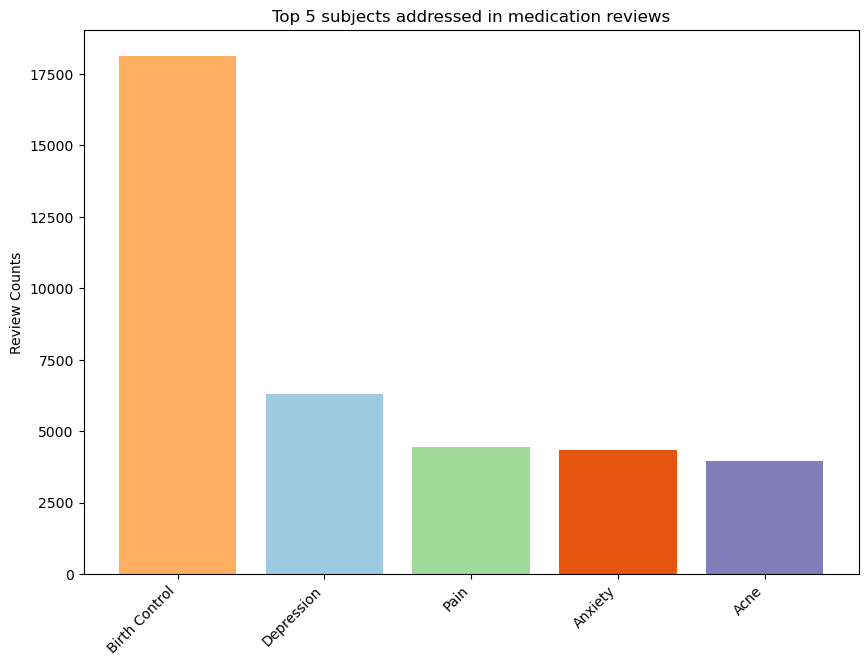

In [13]:
# Plot as a bar chart the top 5
labels = ['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne']
colors = ['#fdae61', '#9ecae1', '#a1d99b', '#e6550d', '#807dba']
plt.figure(figsize=(10, 8))
plt.subplots_adjust(bottom=0.2)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.bar(labels, condition_counts[:5], color=colors)
plt.title('Top 5 subjects addressed in medication reviews', fontsize=12)
plt.ylabel('Review Counts', fontsize=10)

In [14]:
# Now, let's check the medications most talked about in the dataset by date
drug_counts_by_date = drug_reviews_df.groupby(['date', 'drugName']).size()
drug_counts_by_date

date               drugName               
April 1, 2008      Acetaminophen / codeine    3
                   Altace                     1
                   AndroGel                   1
                   Anexsia                    1
                   Carisoprodol               1
                                             ..
September 9, 2017  Sertraline                 3
                   Topiramate                 1
                   Tretinoin                  1
                   Tri-Lo-Marzia              1
                   Victoza                    1
Length: 102115, dtype: int64

In [15]:
# And the top 25
top_25_medications = drug_counts_by_date.groupby('drugName').sum().sort_values(ascending=False).head(25)
top_25_medications

drugName
Levonorgestrel                        2318
Etonogestrel                          2073
Ethinyl estradiol / norethindrone     1748
Phentermine                           1385
Ethinyl estradiol / norgestimate      1374
Nexplanon                             1340
Ethinyl estradiol / levonorgestrel    1211
Sertraline                            1062
Gabapentin                             992
Escitalopram                           945
Miconazole                             890
Metronidazole                          855
Citalopram                             823
Bupropion                              788
Mirena                                 783
Venlafaxine                            759
Tramadol                               748
Tioconazole                            704
Implanon                               684
Clonazepam                             658
Amitriptyline                          655
Quetiapine                             642
Medroxyprogesterone                    631
Du

In [16]:
# Group the data by date and 'drugName' and get the count of each group
drug_counts_by_date = drug_reviews_df.groupby(['date', 'drugName']).size()

# Convert the resulting Series to a DataFrame with columns for 'date', 'drugName', and 'count'
drug_counts_by_date_df = drug_counts_by_date.reset_index(name='count')

# Filter the DataFrame to keep only the top 25 most talked medications
top_25_medications = drug_counts_by_date_df.groupby('drugName').sum().sort_values('count', ascending=False).head(25)
drug_counts_by_date_top_25 = drug_counts_by_date_df[drug_counts_by_date_df['drugName'].isin(top_25_medications.index)]

# Create the histogram plot
fig = px.histogram(drug_counts_by_date_top_25, x='drugName', color='drugName',
                   y='count', template='plotly_white',
                   title='Review counts by medication')
fig.update_xaxes(categoryorder='total descending').update_yaxes(title='Number of reviews')

# Remove the legend
fig.update_traces(showlegend=False)

# Rename the drugName column to Medication
fig.update_layout(xaxis_title='Medication')

fig.show()

The medications most referred in the reviews are under the *birth control* and *depression* themes.

#### 2.1 Calculating the proportion (or the spread) of the data in the dataset

In [17]:
# Calculate the percentage of the occurrence of each subject ("condition")
condition_percentages = condition_counts / (len(drug_reviews_df) * 100)
condition_percentages[:25]

Birth Control                0.001614
Depression                   0.000559
Pain                         0.000395
Anxiety                      0.000385
Acne                         0.000352
Bipolar Disorde              0.000256
Insomnia                     0.000252
Weight Loss                  0.000234
Obesity                      0.000218
ADHD                         0.000195
Vaginal Yeast Infection      0.000179
High Blood Pressure          0.000163
Diabetes, Type 2             0.000145
Emergency Contraception      0.000141
Abnormal Uterine Bleeding    0.000119
ibromyalgia                  0.000112
Anxiety and Stress           0.000110
Smoking Cessation            0.000109
Migraine                     0.000105
Bowel Preparation            0.000104
Constipation                 0.000100
Migraine Prevention          0.000099
Major Depressive Disorde     0.000096
Chronic Pain                 0.000094
Panic Disorde                0.000090
Name: condition, dtype: float64

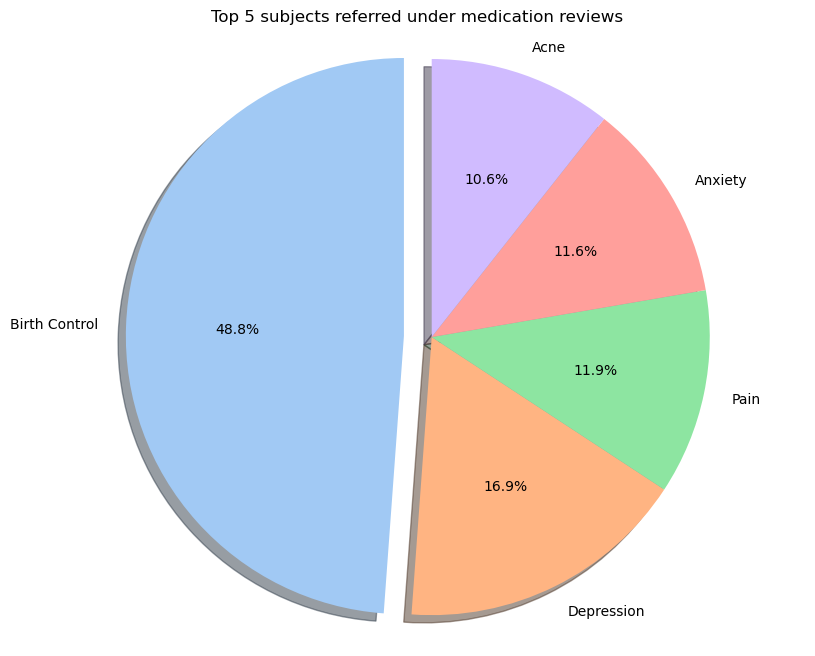

In [18]:
# Plot as a pie chart the top 5 'subjects' ("conditions") that occurr in the dataset
labels = ['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne']
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(10, 8))
explode = (0.1, 0, 0, 0, 0)  # It explodes the 1st slice
plt.pie(condition_percentages[:5], labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True, explode=explode)
plt.title('Top 5 subjects referred under medication reviews', fontsize=12)
plt.axis('equal')
plt.show()

In [19]:
# Check for missing or NaN values
drug_reviews_df.isnull() # It returns a boolean df indicating the presence or absence of missing values in each cell of it

,drugName,condition,review,rating,date,usefulCount
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
161289,False,False,False,False,False,False
161290,False,False,False,False,False,False
161292,False,False,False,False,False,False
161295,False,False,False,False,False,False


In [20]:
# Check for the total missing or NaN values
drug_reviews_df.isnull().sum() # It sums up the number of 'True' values for each column

drugName         0
condition      557
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [21]:
# Investigate the rows that have the missing values
drug_reviews_df[drug_reviews_df.isnull().any(axis=1)]

,drugName,condition,review,rating,date,usefulCount
30,Azithromycin,NaN,"""Very good response. It is so useful for me. """,10.0,"August 18, 2010",1
148,Urea,NaN,"""Accurate information.""",10.0,"July 2, 2011",13
488,Doxepin,NaN,"""So far so good. Good for me and I can take it...",10.0,"October 20, 2010",25
733,Ethinyl estradiol / norgestimate,NaN,"""I haven&#039;t been on it for a long time and...",8.0,"January 24, 2011",1
851,Medroxyprogesterone,NaN,"""I started the shot in July 2015 and ended in ...",6.0,"March 23, 2017",1
...,...,...,...,...,...,...
159341,Pentosan polysulfate sodium,NaN,"""Take 3 pills a day down from 4 because of exp...",10.0,"July 30, 2010",13
159491,Bupropion,NaN,"""Debated long and hard, but finally asked my O...",9.0,"November 30, 2011",29
160468,Multivitamin with minerals,NaN,"""Severe hives itching after taking for 6 months""",5.0,"November 15, 2015",0
160500,Medroxyprogesterone,NaN,"""I am 18 and I have been using the shot for 8 ...",6.0,"November 20, 2011",2


At this context, the missing information is valuable itself, so, as we have reviews for *subjects* ("conditions") that weren't mentioned by the users or mapped by the website where they were posted, we are replacing these *NaN* values for the term *Unknown* category by using the *.fillna( )* method. 

In [22]:
# Replace the NaN for "Unknown" category
drug_reviews_df = drug_reviews_df.fillna("Unknown")
drug_reviews_df.head()

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [23]:
drug_reviews_df.isnull().sum()

drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

#### 2.2 Diving deeper into the statistics of the *rating* classification

In [24]:
# Calculating more statistics of the "rating" as this is an ordinal data type that has valuable information to our analysis (source: Code Academy in https://www.codecademy.com/learn/stats-summary-statistics-for-categorical-data/modules/stats-summary-statistics-for-categorical-data/cheatsheet)
median_value_of_rating = np.median(drug_reviews_df['rating'])
print(f'The median of the rating classification in the reviews is {median_value_of_rating}.')

mean_value_of_rating = np.mean(drug_reviews_df['rating'])
print(f'The mean of the rating classification in the reviews is {mean_value_of_rating}.')

mode_value_of_rating = drug_reviews_df['rating'].mode
print(f'The mode of the rating classification in the reviews is: {mode_value_of_rating}.')

The median of the rating classification in the reviews is 8.0.
The mean of the rating classification in the reviews is 6.996563665660693.
The mode of the rating classification in the reviews is: <bound method Series.mode of 0          9.0
1          8.0
2          5.0
3          8.0
4          9.0
          ... 
161289     1.0
161290     7.0
161292    10.0
161295    10.0
161296     9.0
Name: rating, Length: 112329, dtype: float64>.


Both the *median* and the *mean* have approximate values, so most of the rating classification falls under 8.0 and the average of the rating is closer to 7.0. 

In [25]:
# What about the mode of the drug medication? Which 3 medications are more often addressed during the reviews?
import collections 

medications_name = drug_reviews_df['drugName']
medications_count = collections.Counter(medications_name)

# Find the most common medication names
mode_of_medications = medications_count.most_common(3)
print("The top 3 medications are:")
for i, (medication, count) in enumerate(mode_of_medications):
    print(f"{i+1}. {medication}: {count}")

The top 3 medications are:
1. Levonorgestrel: 2318
2. Etonogestrel: 2073
3. Ethinyl estradiol / norethindrone: 1748


As we can see, it looks like that the medications most quoted are from the group of birth control subject.

In [26]:
# Check for unique values to make sure they are unique
df_counts_of_reviews = drug_reviews_df['review'].value_counts() # It counts de unique value in the dataset
df_counts_of_reviews

"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         1
"I had 2 broken knuckles replaced. Sent home with oxycontin and oxycodone. They were like eating a tic tac. I ended up spending a week in the hospital pushing a button on a pain pump which contained morphine. IT did absolutely nothing for

In [27]:
# Check for unique values of the ratings
df_counts_of_rating = drug_reviews_df['rating'].value_counts() 
df_counts_of_rating

10.0    35531
9.0     19146
1.0     15096
8.0     13198
7.0      6622
5.0      5585
2.0      4802
3.0      4482
6.0      4408
4.0      3459
Name: rating, dtype: int64

In [28]:
# Get the percentage of each rating classification
total_ratings = df_counts_of_rating.sum()
percentage_of_rating = (df_counts_of_rating / total_ratings) * 100
percentage_of_rating 

10.0    31.631191
9.0     17.044574
1.0     13.439094
8.0     11.749415
7.0      5.895183
5.0      4.972002
2.0      4.274942
3.0      3.990065
6.0      3.924187
4.0      3.079347
Name: rating, dtype: float64

In [29]:
# Make it rounded
percentage_of_rating = percentage_of_rating.round(2)
percentage_of_rating

10.0    31.63
9.0     17.04
1.0     13.44
8.0     11.75
7.0      5.90
5.0      4.97
2.0      4.27
3.0      3.99
6.0      3.92
4.0      3.08
Name: rating, dtype: float64

With this result, it is noted that our dataframe is skewed to positive sentiments among the reviewers as most of them in the dataset have a rating classification that range from 8, 9 and 10.

In [30]:
# Convert the "date" column to datetime format
drug_reviews_df['date'] = pd.to_datetime(drug_reviews_df['date'])

# Find the first and last date input in the DataFrame
first_date = drug_reviews_df['date'].min()
last_date = drug_reviews_df['date'].max()

# Print the first and last date input
print('The first date input is:', first_date)
print('The last date input is:', last_date)

The first date input is: 2008-02-24 00:00:00
The last date input is: 2017-12-12 00:00:00


In [31]:
# Use a boolean indexing to extract the row(s) with the first date input
first_date_row = drug_reviews_df[drug_reviews_df['date'] == first_date]
first_date_row.head()

,drugName,condition,review,rating,date,usefulCount
51387,Orlistat,Obesity,"""Xenical really helped me, but some of the bow...",7.0,2008-02-24,50
52404,Macrobid,Bladder Infection,"""Excellent for prevention of bladder infection...",8.0,2008-02-24,52
67737,Oxybutynin,Not Listed / Othe,"""Improved my problem dramatically. I never exp...",7.0,2008-02-24,22
137363,Chlorpheniramine / pseudoephedrine,Allergic Rhinitis,"""I when to a medical clinic with flu like symp...",1.0,2008-02-24,0


In [32]:
first_date_row.tail()

,drugName,condition,review,rating,date,usefulCount
51387,Orlistat,Obesity,"""Xenical really helped me, but some of the bow...",7.0,2008-02-24,50
52404,Macrobid,Bladder Infection,"""Excellent for prevention of bladder infection...",8.0,2008-02-24,52
67737,Oxybutynin,Not Listed / Othe,"""Improved my problem dramatically. I never exp...",7.0,2008-02-24,22
137363,Chlorpheniramine / pseudoephedrine,Allergic Rhinitis,"""I when to a medical clinic with flu like symp...",1.0,2008-02-24,0


As we don't have so many reviews dated from 2008, the first and last posted from this year and gathered to the dataset are the same.

In [33]:
# Use boolean indexing to extract the row(s) with the last date input
last_date_row = drug_reviews_df[drug_reviews_df['date'] == last_date]
last_date_row.head()

,drugName,condition,review,rating,date,usefulCount
1421,Terconazole,Vaginal Yeast Infection,"""This is the meanest diabolical cream. Not sur...",1.0,2017-12-12,0
5833,Propranolol,mance Anxiety,"""I suffer from glossophobia or the fear of pub...",10.0,2017-12-12,0
6823,Kyleena,Birth Control,"""I got Kyleena put in September (2017), so I&#...",9.0,2017-12-12,0
8211,Vaniqa,Hirsutism,"""I&#039;m thrilled with this product. After us...",10.0,2017-12-12,0
8783,Xarelto,Atrial Fibrillation,"""I made a comment here a couple of years ago w...",1.0,2017-12-12,0


In [34]:
last_date_row.tail()

,drugName,condition,review,rating,date,usefulCount
8211,Vaniqa,Hirsutism,"""I&#039;m thrilled with this product. After us...",10.0,2017-12-12,0
8783,Xarelto,Atrial Fibrillation,"""I made a comment here a couple of years ago w...",1.0,2017-12-12,0
103427,Xenical,Obesity,"""So I started just over a week ago, if you eat...",10.0,2017-12-12,0
110317,Infliximab,Rheumatoid Arthritis,"""I was diagnosed with Inflammatory Arthritis (...",10.0,2017-12-12,0
156401,Duloxetine,Depression,"""My doctor switched me to duloxetine from cita...",3.0,2017-12-12,0


In [35]:
# Filter the dataset with only the reviews referred to "birth control"
birth_control_df = drug_reviews_df[drug_reviews_df['condition'] == 'Birth Control']
birth_control_df

,drugName,condition,review,rating,date,usefulCount
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,2015-11-03,10
9,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8.0,2016-12-08,1
14,Nexplanon,Birth Control,"""Started Nexplanon 2 months ago because I have...",3.0,2014-08-07,10
22,Etonogestrel,Birth Control,"""Nexplanon does its job. I can have worry free...",9.0,2014-08-11,11
...,...,...,...,...,...,...
161152,Implanon,Birth Control,"""I got the rod put in Feb of 2016.. sooo 14 mo...",2.0,2017-05-08,5
161196,Lo Loestrin Fe,Birth Control,"""Omg I&#039;ve been taking it for less than a ...",3.0,2017-02-13,7
161232,Ethinyl estradiol / levonorgestrel,Birth Control,"""I&#039;ve been on aleese a month now and it&#...",3.0,2016-08-01,4
161235,Etonogestrel,Birth Control,"""I highly reccomend the implant to anyone. I g...",9.0,2015-10-08,7


In [36]:
birth_control_value_counts = birth_control_df.drugName.value_counts()
birth_control_value_counts[:25] 

Etonogestrel                          2058
Ethinyl estradiol / norethindrone     1403
Nexplanon                             1334
Levonorgestrel                        1332
Ethinyl estradiol / norgestimate      1036
Ethinyl estradiol / levonorgestrel    1028
Implanon                               680
Mirena                                 611
Skyla                                  509
Copper                                 465
Lo Loestrin Fe                         446
Ethinyl estradiol / etonogestrel       409
NuvaRing                               374
Drospirenone / ethinyl estradiol       343
Medroxyprogesterone                    322
Desogestrel / ethinyl estradiol        290
Depo-Provera                           285
Sprintec                               257
Ethinyl estradiol / norelgestromin     243
ParaGard                               230
Norethindrone                          216
Microgestin Fe 1 / 20                  213
Loestrin 24 Fe                         184
Tri-Sprinte

In [37]:
# Let's plot these results
fig = px.histogram(birth_control_df, x='drugName', template='plotly_white', title='Count of reviews per medication to address birth control')
fig.update_xaxes(categoryorder='category descending', title='Medications').update_yaxes(title='Number of reviews')
fig.show()

In [38]:
birth_control_df[birth_control_df['drugName'] == 'Etonogestrel']

,drugName,condition,review,rating,date,usefulCount
22,Etonogestrel,Birth Control,"""Nexplanon does its job. I can have worry free...",9.0,2014-08-11,11
74,Etonogestrel,Birth Control,"""My experience during the nexplon is great not...",10.0,2016-05-27,1
123,Etonogestrel,Birth Control,"""I was put on this birth control when I was 15...",3.0,2016-01-27,0
138,Etonogestrel,Birth Control,"""I absolutely love Nexplanon! Ladies, at first...",9.0,2013-09-29,8
152,Etonogestrel,Birth Control,"""The first 3 years I was on nexplanon I had no...",5.0,2016-08-08,6
...,...,...,...,...,...,...
159990,Etonogestrel,Birth Control,"""I was extremely nervous to get nexplanon beca...",10.0,2015-08-19,8
160651,Etonogestrel,Birth Control,"""So far light bleeding for two weeks then no b...",9.0,2016-10-01,2
160936,Etonogestrel,Birth Control,"""I have had the bar for over 6 months now. For...",3.0,2016-09-21,2
161060,Etonogestrel,Birth Control,"""First 3 months was a nonstop period. The flow...",5.0,2016-04-21,4


In [39]:
birth_control_df[birth_control_df['drugName'] == 'Implanon']

,drugName,condition,review,rating,date,usefulCount
59,Implanon,Birth Control,"""Never again! After being on depo I was suppos...",2.0,2015-08-20,1
63,Implanon,Birth Control,"""I have been on this for 8 months and sad to s...",1.0,2011-09-01,2
234,Implanon,Birth Control,"""I&#039;ve had Implanon for a little over a ye...",1.0,2011-12-13,0
455,Implanon,Birth Control,"""It&#039;s a great birth control... but only b...",3.0,2010-02-02,1
1015,Implanon,Birth Control,"""I got the Implanon 3 years ago and have had n...",10.0,2014-05-08,3
...,...,...,...,...,...,...
159536,Implanon,Birth Control,"""I have had the Implanon for almost 2 yrs now ...",3.0,2012-03-24,1
159860,Implanon,Birth Control,"""Hello! I had the Implanon in for 8 months and...",1.0,2015-04-23,12
160361,Implanon,Birth Control,"""I have to rate this a 5/10 because on one han...",5.0,2015-03-09,3
160723,Implanon,Birth Control,"""I&#039;ve had the Implanon for just over a ye...",8.0,2015-02-23,0


In [40]:
birth_control_df[birth_control_df['drugName'] == 'Mirena']

,drugName,condition,review,rating,date,usefulCount
162,Mirena,Birth Control,"""I am 29 and just had my second Mirena inserte...",9.0,2010-07-21,4
190,Mirena,Birth Control,"""I love my Mirena. I&#039;m due in February to...",10.0,2013-01-14,16
547,Mirena,Birth Control,"""I am 22, no prior children, I have endometrio...",1.0,2015-08-08,20
742,Mirena,Birth Control,"""I have had a wonderful experience with mirena...",10.0,2016-03-16,6
1126,Mirena,Birth Control,"""I&#039;m 18 and I&#039;ve had the Mirena for ...",9.0,2016-03-01,17
...,...,...,...,...,...,...
153483,Mirena,Birth Control,"""I had been experiencing probs with high blood...",3.0,2015-09-11,4
155477,Mirena,Birth Control,"""The pain of insertion was huge and I&#039;ve ...",4.0,2015-04-12,5
157754,Mirena,Birth Control,"""I got my Mirena inserted on Friday (11/18/201...",10.0,2011-11-20,2
159865,Mirena,Birth Control,"""I&#039;m 24, I don&#039;t have kids and I&#03...",9.0,2017-03-31,2


In [41]:
birth_control_df.rating.value_counts()

10.0    3621
9.0     2750
1.0     2749
8.0     1984
5.0     1372
2.0     1326
3.0     1275
7.0     1154
4.0     1011
6.0      888
Name: rating, dtype: int64

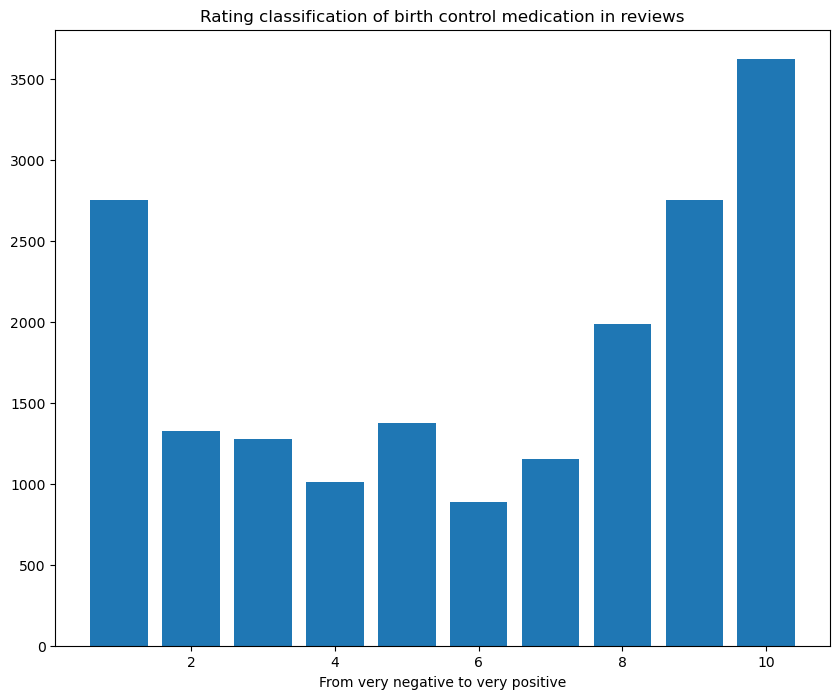

In [42]:
# Plot as a bar chart
labels = [10, 9, 1, 8, 5, 2, 3, 7, 4, 6]
plt.figure(figsize=(10, 8))
plt.bar(labels, birth_control_df.rating.value_counts())
plt.title('Rating classification of birth control medication in reviews', fontsize=12)
plt.xlabel('From very negative to very positive', fontsize=10)
plt.ylabel(None)
plt.show()

Even though the *birth control* dataset looks more balanced than the overall dataset, as it has 4,383 reviews classified as 1 ("very negative"), most of the reviews still are more positive (between the rating range from 8 to 10).

In [43]:
# Filter the dataset with only the reviews referred to "depression"
depression_df = drug_reviews_df[drug_reviews_df['condition'] == 'Depression']
depression_df

,drugName,condition,review,rating,date,usefulCount
11,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10.0,2017-03-09,54
31,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8.0,2011-05-07,3
44,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4.0,2016-04-27,3
67,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10.0,2013-06-20,166
81,Wellbutrin,Depression,"""Started taking it and I slept well at night a...",4.0,2017-01-13,15
...,...,...,...,...,...,...
161104,Desvenlafaxine,Depression,"""I have been on Pristiq for 10 days now. The ...",8.0,2009-08-12,14
161124,Sertraline,Depression,"""I took Sertraline for two months after a shor...",1.0,2016-06-04,23
161132,Remeron,Depression,"""I&#039;ve been on Effexor for several years a...",5.0,2017-10-14,13
161181,Tramadol,Depression,"""Been on these pills for 3 yrs now. Started ou...",8.0,2016-05-18,67


In [44]:
depression_value_counts = depression_df.drugName.value_counts()
depression_value_counts[:25]

Bupropion         390
Sertraline        366
Venlafaxine       315
Citalopram        308
Pristiq           279
Escitalopram      267
Desvenlafaxine    252
Vortioxetine      248
Fluoxetine        220
Duloxetine        208
Cymbalta          199
Vilazodone        195
Lexapro           191
Viibryd           186
Zoloft            185
Mirtazapine       173
Trintellix        148
Wellbutrin        137
Prozac            128
Celexa            128
Effexor           118
Aripiprazole      103
Paroxetine        103
Wellbutrin XL      95
Abilify            86
Name: drugName, dtype: int64

In [45]:
# Let's plot these results
fig = px.histogram(depression_df, x='drugName', template='plotly_white', title='Count of reviews per medication to address depression')
fig.update_xaxes(categoryorder='category descending', title='Medications').update_yaxes(title='Number of reviews')
fig.show()

In [46]:
depression_df[depression_df['drugName'] == 'Bupropion']

,drugName,condition,review,rating,date,usefulCount
153,Bupropion,Depression,"""I was really glad that I experienced none of ...",4.0,2015-10-08,0
184,Bupropion,Depression,"""F/26, Wellbutrin SR 100mg twice a day &amp; I...",10.0,2017-01-02,14
420,Bupropion,Depression,"""Wellbutrin has significantly improved my over...",8.0,2009-06-08,46
1045,Bupropion,Depression,"""I have taken Prozac, Zoloft, Paxil, and then ...",10.0,2013-11-23,41
1087,Bupropion,Depression,"""I was in a bad car accident 3 years ago and i...",10.0,2014-06-22,88
...,...,...,...,...,...,...
158018,Bupropion,Depression,"""I have been on 150mg of Welbutrin SR for a li...",3.0,2017-12-04,1
158071,Bupropion,Depression,"""I am on bupropion SR for 2.5 months and it&#0...",8.0,2012-09-26,71
158140,Bupropion,Depression,"""Only 11 days in so these side effects may dim...",4.0,2017-02-06,8
159642,Bupropion,Depression,"""I&#039;ve been taking wellbutrin 150 SR twice...",4.0,2017-11-02,0


In [47]:
depression_df[depression_df['drugName'] == 'Sertraline']

,drugName,condition,review,rating,date,usefulCount
31,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8.0,2011-05-07,3
504,Sertraline,Depression,"""I was on the sertraline, for 3 years. After d...",6.0,2014-05-12,25
760,Sertraline,Depression,"""I was on Zoloft years 9 years ago for social ...",9.0,2013-03-22,85
1225,Sertraline,Depression,"""I suffered from inherited depression (chemica...",10.0,2012-03-08,45
1621,Sertraline,Depression,"""I began sertraline 50 mg approximately four w...",8.0,2015-05-13,24
...,...,...,...,...,...,...
159496,Sertraline,Depression,"""Worked well in combination with xanax for 3 m...",4.0,2016-07-07,9
160105,Sertraline,Depression,"""Recommend for anyone with anxiety/derpression...",9.0,2015-11-10,16
160150,Sertraline,Depression,"""Helped depression a lot, but side effects we...",9.0,2015-12-01,4
160466,Sertraline,Depression,"""At the moment I am having an episode of sever...",6.0,2016-09-26,27


In [48]:
depression_df[depression_df['drugName'] == 'Prozac']

,drugName,condition,review,rating,date,usefulCount
1405,Prozac,Depression,"""Prozac really worked for me. It kept my depre...",8.0,2013-10-29,44
1490,Prozac,Depression,"""I am beginning my fourth week on 20mg Fluoxet...",7.0,2016-01-15,73
4342,Prozac,Depression,"""Been on fluoxetine for 7 weeks now, I got my ...",6.0,2014-03-11,31
4750,Prozac,Depression,"""I&#039;ve been taking Prozac for about 4 year...",7.0,2012-01-23,14
4891,Prozac,Depression,"""Prozac has saved my life. I was unable to fun...",10.0,2012-05-05,68
...,...,...,...,...,...,...
147624,Prozac,Depression,"""I was prescribed Prozac last year for depress...",1.0,2017-05-12,33
157848,Prozac,Depression,"""Prozac is really a life saver.""",10.0,2014-07-26,103
157888,Prozac,Depression,"""I&#039;ve been on this for a year at 20mg and...",10.0,2015-10-10,115
157893,Prozac,Depression,"""I have been on fluoxetine for less than a mon...",7.0,2016-04-16,23


In [49]:
depression_df.rating.value_counts()

10.0    1756
9.0     1236
8.0      854
1.0      706
7.0      471
6.0      294
5.0      289
2.0      254
3.0      240
4.0      181
Name: rating, dtype: int64

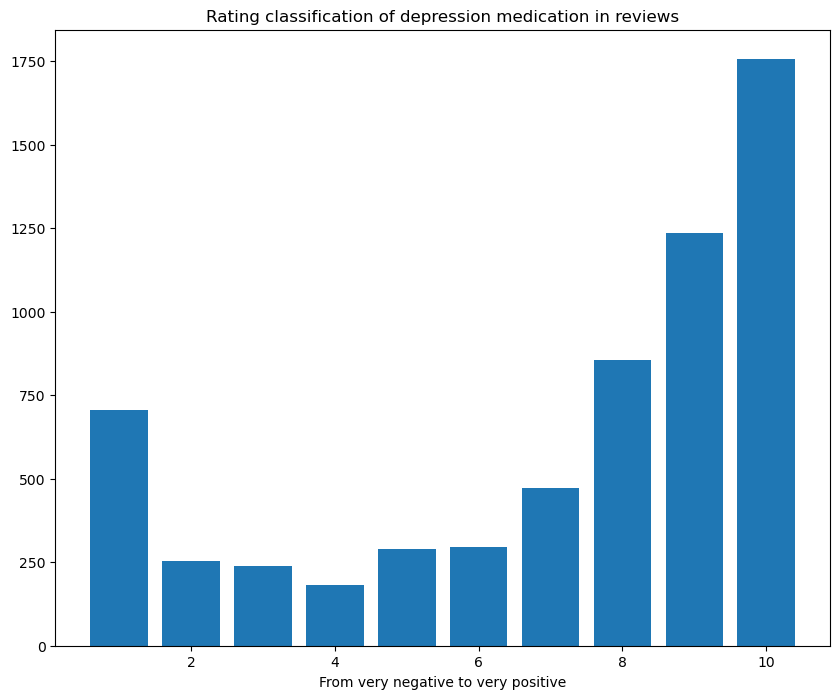

In [50]:
# Plot as a bar chart
labels = [10, 9, 8, 1, 7, 6, 5, 2, 3, 4]
plt.figure(figsize=(10, 8))
plt.bar(labels, depression_df.rating.value_counts())
plt.title('Rating classification of depression medication in reviews', fontsize=12)
plt.xlabel('From very negative to very positive', fontsize=10)
plt.ylabel(None)
plt.show()

Most of the reviews of the users under the theme of *depression* medications are classified in the rating range from 8 to 10 (as "very positive"), whereas a small fraction were rated with 1 ( "very negative").

In [51]:
# Filter the dataset with only the reviews referred to "pain"
pain_df = drug_reviews_df[drug_reviews_df['condition'] == 'Pain']
pain_df

,drugName,condition,review,rating,date,usefulCount
32,Toradol,Pain,"""I am 30 years old. I had a multiple composite...",10.0,2013-02-11,16
37,Morphine,Pain,"""I have been on morphine for at least 7 years....",8.0,2010-05-08,19
52,Buprenorphine,Pain,"""My pain management doctor put me on Butrans p...",8.0,2011-06-24,125
62,Buprenorphine,Pain,"""I love my Butrans patch!!! And it has relieve...",10.0,2015-08-06,47
108,Acetaminophen / hydrocodone,Pain,"""I suffer from chronic pain due to severe arth...",8.0,2016-12-06,3
...,...,...,...,...,...,...
161125,Methadone,Pain,"""I was on oxycontin 40mg 2x a day but had to i...",8.0,2008-07-25,44
161126,Ultracet,Pain,"""66 yo with badly damaged ankles--both need re...",9.0,2014-08-17,56
161128,Codeine,Pain,"""Codeine very effective for pain, but some peo...",10.0,2011-11-14,15
161148,Duloxetine,Pain,"""Lowered pain when taken regularly. If a dose ...",8.0,2012-12-12,32


In [52]:
pain_value_counts = pain_df.drugName.value_counts()
pain_value_counts[:25]

Tramadol                       319
Acetaminophen / hydrocodone    240
Oxycodone                      215
Acetaminophen / oxycodone      191
Gabapentin                     165
Diclofenac                     160
Tapentadol                     142
Hydromorphone                  133
Methadone                      106
Amitriptyline                  103
Nucynta                        100
Ketorolac                       98
Dilaudid                        95
Fentanyl                        95
Oxymorphone                     85
Percocet                        84
Morphine                        81
OxyContin                       76
Hydrocodone                     75
Toradol                         69
Acetaminophen / codeine         68
Norco                           63
Nortriptyline                   59
Ultram                          56
Pregabalin                      56
Name: drugName, dtype: int64

In [53]:
# Let's plot these results
fig = px.histogram(pain_df, x='drugName', template='plotly_white', title='Count of reviews per medication to address pain')
fig.update_xaxes(categoryorder='category descending', title='Medications').update_yaxes(title='Number of reviews')
fig.show()

In [54]:
pain_df[pain_df['drugName'] == 'Tramadol']

,drugName,condition,review,rating,date,usefulCount
688,Tramadol,Pain,"""Been on Tramadol off and on for minor headach...",9.0,2017-02-13,25
1319,Tramadol,Pain,"""I have recently been put on Tramadol for chro...",2.0,2011-11-10,4
1780,Tramadol,Pain,"""Took severe pain away. Hand and neck arthriti...",9.0,2017-03-24,31
2051,Tramadol,Pain,"""Been taking for a couple of weeks works good ...",8.0,2009-10-28,5
2407,Tramadol,Pain,"""I&#039;m taking it for Pain From Joint Hyperm...",10.0,2015-04-14,22
...,...,...,...,...,...,...
158983,Tramadol,Pain,"""When I went into labor I had to have a episio...",10.0,2016-01-14,12
159011,Tramadol,Pain,"""One not enough. Two caused nausea and stomach...",6.0,2014-01-08,38
159656,Tramadol,Pain,"""I have chronic Lumbar pain...residual after a...",10.0,2017-02-22,53
160558,Tramadol,Pain,"""I have been taking Tramadol (200mg every 12 h...",8.0,2009-06-25,23


In [55]:
pain_df[pain_df['drugName'] == 'Oxycodone']

,drugName,condition,review,rating,date,usefulCount
499,Oxycodone,Pain,"""Had disc replaced L5- S1 with laminectomy plu...",9.0,2011-12-13,8
639,Oxycodone,Pain,"""Life is livable again. I have had no side eff...",10.0,2011-11-02,74
1537,Oxycodone,Pain,"""Five years ago, I was close to suicidal with ...",3.0,2010-10-26,79
1631,Oxycodone,Pain,"""I have been ill for 40 of my 52 years with my...",10.0,2008-09-13,9
4360,Oxycodone,Pain,"""I have had severe AS/RA (Ankylosing Spondylit...",9.0,2010-12-12,3
...,...,...,...,...,...,...
156598,Oxycodone,Pain,"""LIKES: It works on post surgical pain. While...",6.0,2011-05-09,3
158940,Oxycodone,Pain,"""I recently snapped my fibula in half in a bic...",8.0,2015-02-27,29
159510,Oxycodone,Pain,"""I have been on several variations of opiate m...",9.0,2008-08-14,12
160218,Oxycodone,Pain,"""I have neuropathy in both feet up to my knees...",10.0,2009-06-19,15


In [56]:
pain_df[pain_df['drugName'] == 'Pregabalin']

,drugName,condition,review,rating,date,usefulCount
982,Pregabalin,Pain,"""I have suffered severe pain for 20 years foll...",10.0,2011-09-15,55
1348,Pregabalin,Pain,"""For the past 3 years I have been dealing with...",10.0,2009-01-29,27
2337,Pregabalin,Pain,"""I have a pinched sciatic nerve in my lower ba...",10.0,2010-07-21,63
2445,Pregabalin,Pain,"""Been suffering with low back pain worse in th...",8.0,2015-03-15,78
3031,Pregabalin,Pain,"""This medicine helped my problem - 2 herniated...",4.0,2009-11-22,13
4887,Pregabalin,Pain,"""I have suffered with severe pain from neurofi...",9.0,2009-05-23,21
9881,Pregabalin,Pain,"""I found Pregabalin help the pain from my spin...",3.0,2016-04-27,26
14203,Pregabalin,Pain,"""Lyrica has been a life saver for me. Prior t...",9.0,2010-08-14,46
14592,Pregabalin,Pain,"""This medication has helped my back pain a gre...",10.0,2008-09-26,52
19043,Pregabalin,Pain,"""My mother takes Lyrica for bulging disc pain ...",7.0,2009-07-21,21


In [57]:
pain_df.rating.value_counts()

10.0    1495
9.0      945
8.0      664
1.0      441
7.0      272
5.0      141
6.0      135
2.0      126
3.0      125
4.0       89
Name: rating, dtype: int64

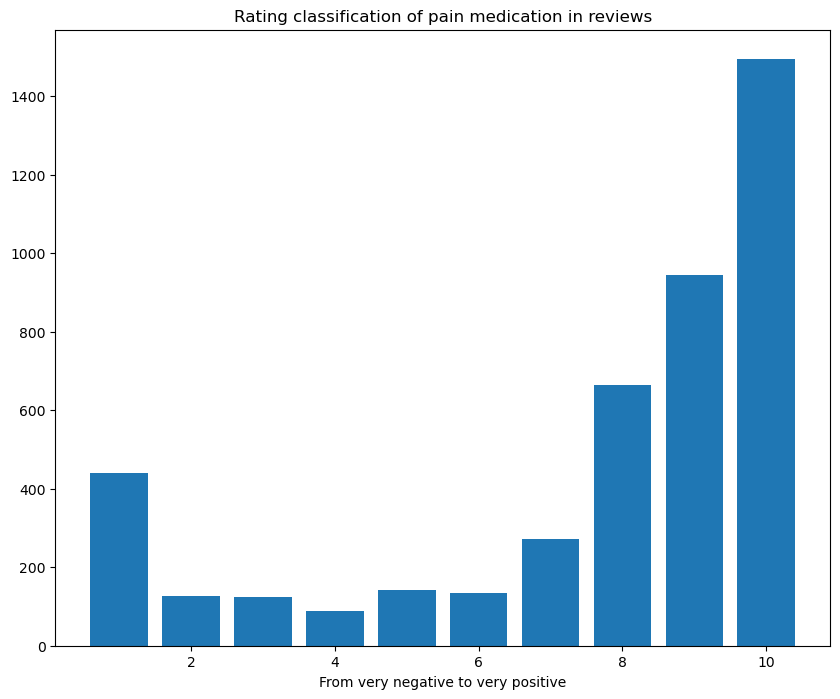

In [58]:
# Plot as a bar chart
labels = [10, 9, 8, 1, 7, 5, 6, 2, 3, 4]
plt.figure(figsize=(10, 8))
plt.bar(labels, pain_df.rating.value_counts())
plt.title('Rating classification of pain medication in reviews', fontsize=12)
plt.xlabel('From very negative to very positive', fontsize=10)
plt.ylabel(None)
plt.show()

This result looks like to the previous one: the reviews of the medications about *depression* and *pain* are more skewed to be evaluated as positive among the reviewers. Therefore, this partial results can give us some information about a "tendency" of the flow of the evaluations as one evaluation might influence the others which was stated by one of our hypothesis. Also, it is interesting to mention that if there is more positive reviews than negative ones in a specific website, this could also impact a reviewer to write an evaluation that follows the same point of vew (in case they share it) or even can impact them to withdraw the action of writing it (in case there is no alignment in the experience, this might cause discomfort in the reviewer as this is not the experience that it has been shared between most of the reviewers).

Thus, from this EDA, we decided to follow 2 paths: 

* First, we are going to use the total dataset which has different themes ("conditions") to train our machine learning model to predict sentiment of the reviews; 

* Second, we are going to save a sample of *birth control* subject from it as this matter might offer a more equally balanced distribution between positive and negative *reviews* than the others; and, also, is under of the *topics* with more reviews of the dataset, to be studied in comparison with the most medications quoted on it in the future.

In [59]:
drug_reviews_df.head()

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,2012-05-20,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,2010-04-27,192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,2015-11-03,10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,2016-11-27,37


In [60]:
drug_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112329 entries, 0 to 161296
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   drugName     112329 non-null  object        
 1   condition    112329 non-null  object        
 2   review       112329 non-null  object        
 3   rating       112329 non-null  float64       
 4   date         112329 non-null  datetime64[ns]
 5   usefulCount  112329 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 6.0+ MB


In [61]:
# Save the dataset 'drug_reviews_df' already cleaned to a .csv file
drug_reviews_df.to_csv('medication_reviews_dataset.csv', index=False)

In [62]:
birth_control_df.head()

,drugName,condition,review,rating,date,usefulCount
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,2015-11-03,10
9,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8.0,2016-12-08,1
14,Nexplanon,Birth Control,"""Started Nexplanon 2 months ago because I have...",3.0,2014-08-07,10
22,Etonogestrel,Birth Control,"""Nexplanon does its job. I can have worry free...",9.0,2014-08-11,11


In [63]:
birth_control_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18130 entries, 2 to 161271
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   drugName     18130 non-null  object        
 1   condition    18130 non-null  object        
 2   review       18130 non-null  object        
 3   rating       18130 non-null  float64       
 4   date         18130 non-null  datetime64[ns]
 5   usefulCount  18130 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 991.5+ KB


In [64]:
birth_control_df.shape

(18130, 6)

In [65]:
# Save the dataset grouped by "birth control" already cleaned in a new .csv file
birth_control_df.to_csv('birth_control_sample_dataset.csv', index=False)